# Einflussfaktoren auf die Fahrzeugflotten in deutschen Landkreisen

In [1]:
import sys
import os

sys.path.insert(0, os.path.abspath('..'))

from src.data_preparation_utils import *

## Einleitung und Daten

### Hintergrund und Motivation
Die Reduktion von Emissionen und die Förderung umweltfreundlicher Fahrzeuge sind zentrale Ziele der Verkehrspolitik. Die Einführung neuer Emissionsvorschriften, wie die Euro6-Norm, sowie die Verbreitung neuer Technologien, wie Elektrofahrzeuge und Plug-in-Hybride, haben das Potenzial, die Zusammensetzung der Fahrzeugflotten in den Landkreisen erheblich zu beeinflussen. Gleichzeitig können sozioökonomische Faktoren wie das verfügbare Einkommen pro Einwohner und die Unfallrate eine Rolle bei der Erneuerung der Fahrzeugflotten spielen.

### These
Die gesetzliche Einführung neuer Emissionsvorschriften wird voraussichtlich einen signifikanten Einfluss auf die Bestandsflotte haben. Es wird erwartet, dass der Anteil von Euro4-Fahrzeugen in Landkreisen mit einem hohen Anteil neuer Technologien (wie Plug-in-Hybriden und Elektrofahrzeugen) abnimmt. Gleichzeitig könnten sozioökonomische Faktoren wie das verfügbare Einkommen und die Unfallrate ebenfalls eine Rolle bei der Erneuerung der Fahrzeugflotten spielen. In Landkreisen mit einer älteren Fahrzeugflotte, die durch einen hohen Anteil von Fahrzeugen der Emissionsgruppen Euro2 und Euro3 gekennzeichnet ist, wird jedoch erwartet, dass der Anteil von Euro4-Fahrzeugen trotz neuer Emissionsvorschriften und Technologien robust bleibt.

### Forschungsfrage und Ziel des Modells
Welche Faktoren beeinflussen den Anteil von Euro4-Fahrzeugen in deutschen Landkreisen und wie stark ist dieser Einfluss?

Das multiple lineare Regressionsmodell soll dazu verwendet werden, die folgenden Fragen zu beantworten:
 - Identifikation relevanter Prädiktoren: Welche Variablen haben einen signifikanten Einfluss auf den Anteil von Euro4-Fahrzeugen?
 - Quantifizierung des Einflusses: Wie stark ist der Einfluss der identifizierten Prädiktoren auf den Anteil von Euro4-Fahrzeugen?
 - Modellgüte und Generalisierbarkeit: Wie gut erklärt das Modell die Varianz im Anteil von Euro4-Fahrzeugen und wie gut generalisiert es auf neue Daten?

### Datenbeschreibung

Für die Analyse soll ein Gesamt-Datensatz aus den folgenden vier Datenquellen erstellt werden:
1. Daten über Fahrzeugbestand
2. Bevölkerungsdaten
3. Daten über Einkommen der privaten Haushalte
4. Straßenverkehrsunfälle

Jede dieser Datenquellen ist nicht für jedes Jahr verfügbar. Eine gemeinsame Schnittmenge existiert für das Jahr 2019, in dem alle Teil-Datensätze erhoben wurden. Daher wird der Gesamt-Datensatz auf das Jahr 2019 beschränkt.

Vorteile der Beschränkung auf das Jahr 2019
- Vermeidung von Zeitabhängigkeiten: Durch die Beschränkung auf ein Jahr werden zeitliche Abhängigkeiten und Trends eliminiert, was die Modellierung vereinfacht.
- Konsistenz der Daten: Alle Datenquellen sind für das Jahr 2019 verfügbar, was eine konsistente und vollständige Datenbasis gewährleistet.
- Fokus auf Querschnittsdaten: Für ein multiples lineares Regressionsmodell kann es sinnvoll sein, sich auf Querschnittsdaten zu konzentrieren, um die Einflüsse der verschiedenen Prädiktoren auf die Zielvariable zu isolieren.

Die Rohdaten für dieses Projekt sind im Projektverzeichnis unter `data/raw` abgelegt. Von dort aus müssen sie zur weiteren Bearbeitung eingelesen werden.

**1. Daten über Fahrzeugbestand (nach Kraftstoffart und Emissionsgruppen)**
- Quelle: [Statistik des Kraftfahrzeug- und Anhängerbestandes, Statistisches Bundesamt, Code: 46251-0021](https://www-genesis.destatis.de/genesis/online/data)
- Beschreibung der Beobachtungen im Datensatz: Vom Kraftfahrt-Bundesamt werden aus Meldungen der Kraftfahrzeug-Zulassungsstellen Statistiken über den Bestand an Kraftfahrzeugen und Anhängern (jährlich), Neuzulassungen (monatlich), Besitzumschreibungen (monatlich) und Löschungen (jährlich) durchgeführt. Die statistischen Auswertungen umfassen alle nach der Straßenverkehrs-Zulassungs-Ordnung (StVZO) in Deutschland zugelassenen bzw. angemeldeten Fahrzeuge, denen ein amtliches Kennzeichen zugeteilt wurde. Mit einbezogen sind Fahrzeuge, die vorübergehend stillgelegt wurden sowie Fahrzeuge des Bundesgrenzschutzes (BGS) und des Technischen Hilfswerkes (THW). Dagegen sind nicht einbezogen die Fahrzeuge der Bundeswehr sowie Fahrzeuge mit rotem Kennzeichen und mit Ausfuhrkennzeichen.
- Datenerhebung: Dem Kraftfahrtbundesamt (KBA) obliegt die statistische Bearbeitung der Datenmeldungen der Zulassungsbehörden und der Haftpflichtversicherungen (Kfz mit Versicherungs-kennzeichen) sowie des Zentralen Fahrzeugregisters (ZFZR). Es handelt sich dabei um Sekundärstatistiken, denen die gemeldeten Kraftfahrzeuge und Kraftfahrzeuganhänger mit deren Halterangaben zugrunde liegen.
- Variablen:
    - Landkreise (476 Merkmalsausprägungen)
    - Kraftstoffarten (7 Merkmalsausprägungen je Landkreis ohne Aggregation `Insgesamt`)
    - Emissionsgruppen (9 Merkmalsausprägungen je Kraftstoffart ohne Aggregation `Insgesamt`)
    - Anzahl der Fahrzeuge (je Emissionsgruppe, Kraftstoffart, Landkreis)

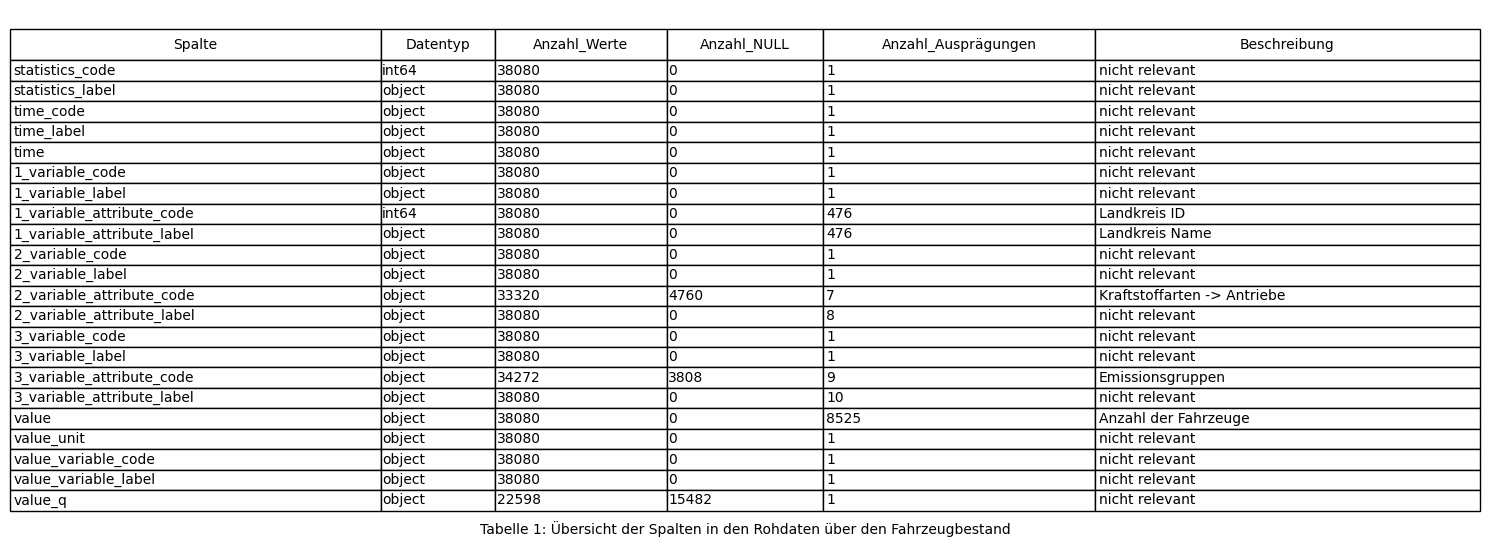

In [2]:
create_info_figure(df_kfz, 'Tabelle 1: Übersicht der Spalten in den Rohdaten über den Fahrzeugbestand')

**2. Bevölkerungsdaten**
- Quelle: [Bevölkerung am Hauptwohnort nach Altersgruppen und Geschlecht, Regionalstatistik, Code: 12211-Z-03](https://www.regionalstatistik.de/genesis/online/)
- Beschreibung der Beobachtungen im Datensatz: Für die Darstellung von Ergebnissen des Mikrozensus auf Individualebene - ohne Bezug zum Haushalts- und Lebensformkontext - wird die "Bevölkerung am Ort der alleinigen bzw. Hauptwohnung" zu Grunde gelegt. Zur "Bevölkerung" gehören nach diesem Bevölkerungsbegriff alle Personen mit nur einer Wohnung sowie Personen mit mehreren Wohnungen am Ort ihrer Hauptwohnung. Dies ist die vorwiegend genutzte Wohnung einer Person. Aus melderechtlichen Gründen werden Soldatinnen und Soldaten im Grundwehrdienst oder auf Wehrübung der Wohngemeinde vor ihrer Einberufung zugeordnet. Entsprechend wird bei Patientinnen und Patienten in Krankenhäusern sowie bei Personen in Untersuchungshaft verfahren. Berufssoldatinnen und Berufssoldaten, Soldatinnen und Soldaten auf Zeit, Angehörige des Bundesgrenzschutzes und der Bereitschaftspolizei in Gemeinschaftsunterkünften werden ebenso wie die Strafgefangenen sowie alle Dauerinsassen von Gemeinschaftsunterkünften und das in diesen Unterkünften wohnende Personal sowohl in den Gemeinden, die diese Unterkünfte beherbergen, als auch in den Gemeinden, in denen sie evtl. einen weiteren Wohnsitz haben, erfasst. Angehörige der ausländischen Stationierungsstreitkräfte sowie der ausländischen diplomatischen und konsularischen Vertretungen mit ihren Familienangehörigen werden grundsätzlich nicht statistisch ermittelt.
- Datenerhebung: Mikrozensus auf Individualebene aus Meldungen der Einwohnermeldeämter
- Variablen:
    - Landkreise (489 Merkmalsausprägungen; Aggregate: Bundesländer, Deutschland)
    - Altersgruppen (4 Merkmalsausprägungen je Landkreis ohne Aggregation `Insgesamt`)
    - Geschlecht (2 Merkmalsausprägungen je Altersgruppe ohne Aggregation `Insgesamt`)
    - Anzahl der Personen in Tausend (je Geschlecht, Altersgruppe, Landkreis)

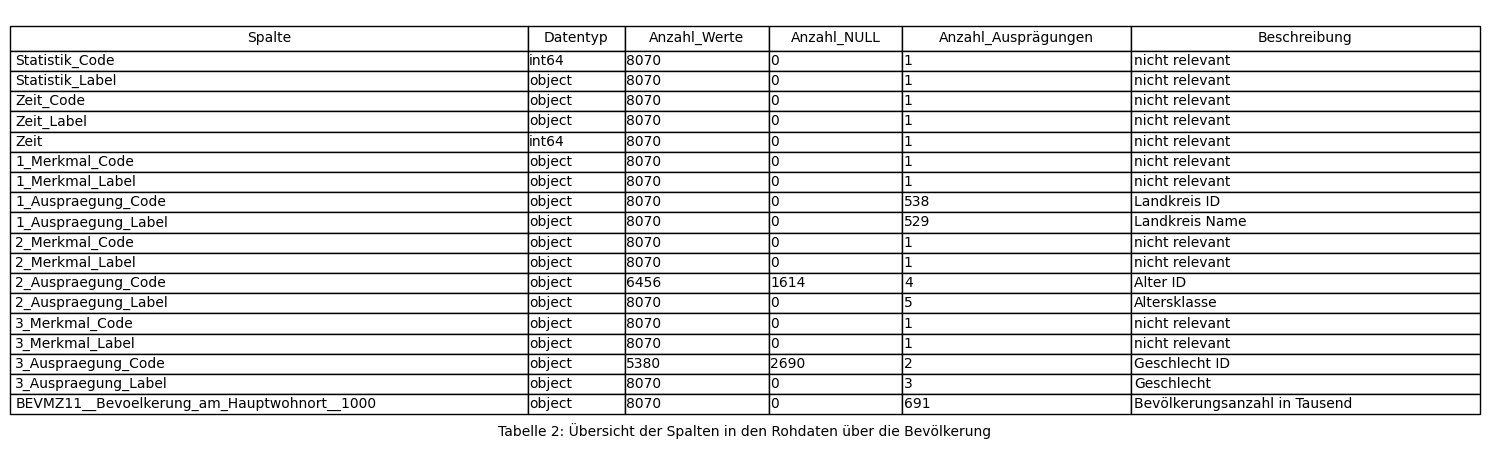

In [3]:
create_info_figure(df_pop, 'Tabelle 2: Übersicht der Spalten in den Rohdaten über die Bevölkerung')

Die Zahlen in der obigen Tabelle verdeutlichen erhebliche Unstimmigkeiten im Datensatz. Besonders auffällig ist die Diskrepanz in der Anzahl der Landkreis-IDs (538), die von der in der Datenbeschreibung angegebenen Anzahl abweicht. Darüber hinaus gibt es Unterschiede zwischen der Anzahl der Landkreisnamen (529) und der Landkreis-IDs (538). Dies weist auf eine inkonsistente Datenstruktur hin. Die Tatsache, dass es 529 Landkreisnamen, aber 538 IDs gibt, impliziert, dass gleichnamige Landkreise unter derselben ID zusammengefasst sein müssten. Diese Inkonsistenz erfordert eine gezielte Berücksichtigung bei der Datenaufbereitung.

Darüber hinaus ist der Datensatz unvollständig. Bei einer vollständigen Erhebung wären inklusive Aggregation ("+1") für 489 Landkreise, jeweils aufgeschlüsselt nach (4+1) Altersgruppen und (2+1) Geschlechterkategorien, bis zu 7335 Bevölkerungsanzahl-Ausprägungen zu erwarten gewesen. Bei der Analyse der .csv-Datei wurde festgestellt, dass insbesondere auf der tiefsten Granularitätsebene häufig Daten fehlen.

Um diese Unstimmigkeiten und Lücken zu adressieren, wird bei der Datenaufbereitung auf die Granularität verzichtet, sodass lediglich die Gesamtbevölkerungszahlen berücksichtigt werden. Außerdem werden ausschließlich Landkreise einbezogen, deren IDs auch im Datensatz für den Fahrzeugbestand vorhanden sind.

**3. Daten über Einkommen der privaten Haushalte**
- Quelle: [Verfügbares Einkommen je Einwohner, Regionalstatistik, Code: AI-S-01](https://www.regionalstatistik.de/genesis/online/)
- Beschreibung der Beobachtungen im Datensatz: Verfügbares Einkommen der privaten Haushalte einschließlich privater Organisationen ohne Erwerbszweck je Einwohnerin bzw. Einwohner in EUR. Der Indikator gibt Auskunft über den (monetären) Wohlstand der Bevölkerung und ist als der durchschnittliche Betrag zu verstehen, der je Einwohnerin bzw. Einwohner für Konsum- und Sparzwecke zur Verfügung steht. Für die Berechnung des Indikators „Verfügbares Einkommen der privaten Haushalte einschließlich privater Organisationen ohne Erwerbszweck je Einwohnerin bzw. Einwohner in EUR“ wird der Wert des Verfügbaren Einkommens in jeweiligen Preisen im Jahr durch die Zahl der Einwohnerinnen und Einwohner im Jahresdurchschnitt dividiert. Für die Berechnung des Indikators 'Verfügbares Einkommen der privaten Haushalte einschließlich privater Organisationen ohne Erwerbszweck je Einwohnerin bzw. Einwohner in EUR' wird die jahresdurchschnittliche Zahl der Einwohnerinnen und Einwohner auf Basis des Zensus 2011 herangezogen. Die durchschnittliche Jahresbevölkerung ist das arithmetische Mittel aus Jahresanfangs- und Jahresendbestand. Bei diesen Ergebnissen handelt es sich um Ergebnisse der Revision 2014 der Volkswirtschaftlichen Gesamtrechnungen der Länder. Die VGR-Generalrevision 2014 dient in erster Linie der europaweiten Einführung des neuen Europäischen Systems Volkswirtschaftlicher Gesamtrechnungen (ESVG 2010), welches eine Vielzahl von konzeptionellen Änderungen mit sich bringt. Darüber hinaus wurden sämtliche bisherigen Berechnungen und Ergebnisse überprüft sowie neue Erkenntnisse, methodische Verbesserungen und, soweit möglich, neue Datenquellen in das Rechenwerk integriert.
- Datenerhebung: Der Indikator beruht auf Daten des Arbeitskreises "Volkswirtschaftliche Gesamtrechnungen der Länder". Die Ergebnisse beziehen sich immer auf den zum jeweiligen Veröffentlichungstermin maßgeblichen Berechnungsstand.
- Variablen:
    - Landkreise (489 Merkmalsausprägungen; Aggregate: Bundesländer, Deutschland)
    - Verfügbares Einkommen je Einwohner (je Landkreis)

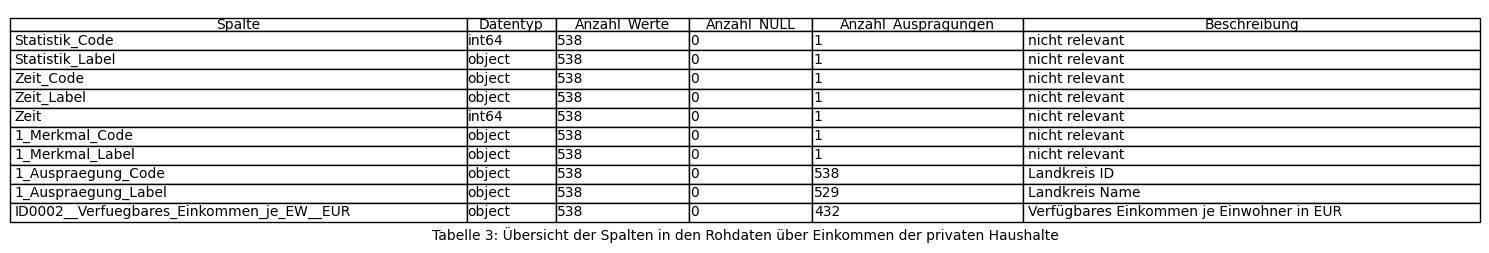

In [4]:
create_info_figure(df_vee, 'Tabelle 3: Übersicht der Spalten in den Rohdaten über Einkommen der privaten Haushalte')

**4. Straßenverkehrsunfälle**
- Quelle: [Straßenverkehrsunfälle bezogen auf Kfz, Regionalstatistik, Code: AI013-3](https://www.regionalstatistik.de/genesis/online/)
- Beschreibung der Beobachtungen im Datensatz: Der Indikator ist ein Maßstab für die Unfallhäufigkeit im Straßenverkehr. Die Kennziffer hat jedoch den Nachteil, dass nur die am Ort gemeldeten Kfz berücksichtigt werden und ein starker Durchgangsverkehr oder ein hohes Pendleraufkommen das Ergebnis verfälschen. Dem Umfang des Verkehrsaufkommens wird also nicht genügend Rechnung getragen. Für die Berechnung des Indikators 'Straßenverkehrsunfälle je 10.000 Kfz' wird die Zahl der Straßenverkehrsunfälle im Jahr durch die Zahl der Kraftfahrzeuge am 01.01. des Jahres dividiert und mit 10.000 multipliziert.
- Datenerhebung: Der Indikator beruht auf Daten aus der Statistik der Straßenverkehrsunfälle sowie auf Daten der amtlichen Kraftfahrzeugstatistik des Kraftfahrt-Bundesamtes zum Kraftfahrzeugbestand.
- Variablen:
    - Landkreise (489 Merkmalsausprägungen; Aggregate: Bundesländer, Deutschland)
    - Straßenverkehrsunfälle je 10.000 Kfz (je Landkreis)

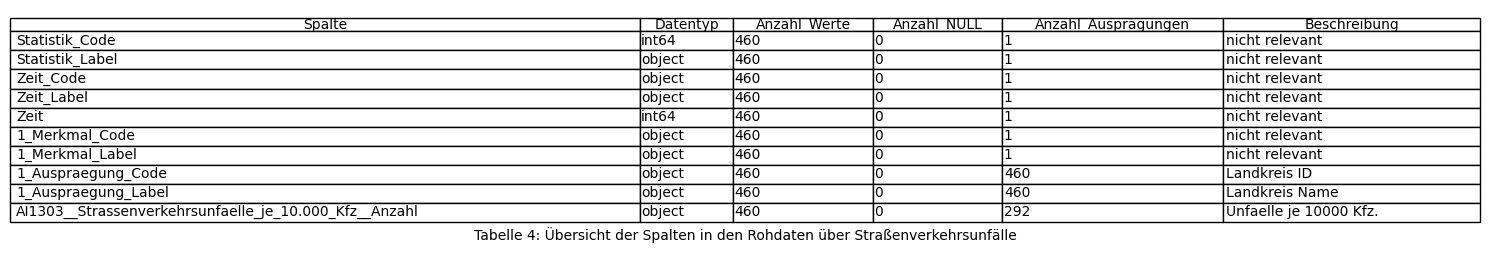

In [5]:
create_info_figure(df_svu, 'Tabelle 4: Übersicht der Spalten in den Rohdaten über Straßenverkehrsunfälle')

### Datenbereinigung und Vorverarbeitung

- relevante Spaltennamen werden gemäß Tabelle 5 (neuer Spaltenname) umbenannt
- Datentypen werden gemäß Tabelle 5 (Datentyp) festgelegt

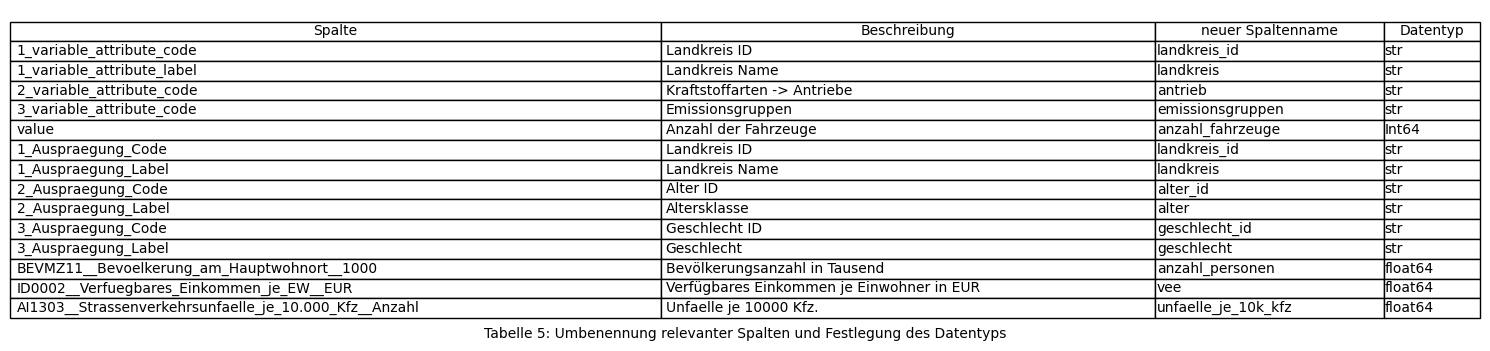

In [6]:
df_relevant_cols = pd.DataFrame(relevant_cols)
df_relevant_cols.columns = ["Spalte", "Beschreibung", "neuer Spaltenname", "Datentyp"]
create_table_figure(df_relevant_cols, 'Tabelle 5: Umbenennung relevanter Spalten und Festlegung des Datentyps')

In [7]:
rename_columns(df_pop, relevant_cols).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8070 entries, 0 to 8069
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Statistik_Code   8070 non-null   int64  
 1   Statistik_Label  8070 non-null   object 
 2   Zeit_Code        8070 non-null   object 
 3   Zeit_Label       8070 non-null   object 
 4   Zeit             8070 non-null   int64  
 5   1_Merkmal_Code   8070 non-null   object 
 6   1_Merkmal_Label  8070 non-null   object 
 7   landkreis_id     8070 non-null   object 
 8   landkreis        8070 non-null   object 
 9   2_Merkmal_Code   8070 non-null   object 
 10  2_Merkmal_Label  8070 non-null   object 
 11  alter_id         8070 non-null   object 
 12  alter            8070 non-null   object 
 13  3_Merkmal_Code   8070 non-null   object 
 14  3_Merkmal_Label  8070 non-null   object 
 15  geschlecht_id    8070 non-null   object 
 16  geschlecht       8070 non-null   object 
 17  anzahl_persone

- Spaltenwerte werden standardisiert, was die Transformation und das Zusammenfügen der Daten vereinfachen wird.
    - führende Nullen werden aus den `landkreis_id` in allen Datensätzen entfernt.
    - Werte in den Spalten `antrieb` und `emissionsgruppen` werden in Kleinbuchstaben konvertiert.
    - Präfixe und `-` Zeichen werden aus den Spalten `antrieb` und `emissionsgruppen` entfernt.
    - In der Spalte `antrieb` wird `sonst` durch `sonstigeantriebe` ersetzt.
    - In der Spalte `emissionsgruppen` wird `sonst` durch `sonstigeemissionsgruppen` ersetzt.
    - In der Spalte `emissionsgruppen` wird `euro6r` durch `euro6` ersetzt.

- Relevante Zeilen filtern & Umgang mit fehlenden Daten
    - Alle Zeilen mit NaN-Werten werden aus dem `df_kfz` Datensatz entfert (betrifft nur die aggregierten Zeilen).
    - Alle Zeilen von Landkreisen mit einer Gebietsreform werden aus dem `df_kfz` Datensatz entfert (`landkreis`-Wert endet beispielsweise mit "(bis 03.09.2011)").
    - Nur die Zeilen mit der Gesamteinwohnerzahl im Datensatz `df_pop` behalten (alter_id und geschlecht_id sind NaN). Damit wird Granularität aufgegeben, aber in den meisten Datensätzen sind die Einwohnerzahlen ohnehin nicht nach Geschlecht und Altergruppe aufgeschlüsselt.

## Methodology

> REMOVE THE FOLLOWING TEXT

This section includes a brief description of your modeling process.

Explain the reasoning for the type of model you're fitting, predictor variables considered for the model.

Additionally, show how you arrived at the final model by describing the model selection process, variable transformations (if needed), assessment of conditions and diagnostics, and any other relevant considerations that were part of the model fitting process.

## Results

> REMOVE THE FOLLOWING TEXT

This is where you will output the final model with any relevant model fit statistics.

Describe the key results from the model.
The goal is not to interpret every single variable in the model but rather to show that you are proficient in using the model output to address the research questions, using the interpretations to support your conclusions.

Focus on the variables that help you answer the research question and that provide relevant context for the reader.


## Discussion + Conclusion


> REMOVE THE FOLLOWING TEXT

In this section you'll include a summary of what you have learned about your research question along with statistical arguments supporting your conclusions.
In addition, discuss the limitations of your analysis and provide suggestions on ways the analysis could be improved.
Any potential issues pertaining to the reliability and validity of your data and appropriateness of the statistical analysis should also be discussed here.
Lastly, this section will include ideas for future work.